# TRANSACTION_TAKEHOME

### Load libraries and data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/Users/rohanshah_95/Desktop/Fetch/TRANSACTION_TAKEHOME.csv')

### Explore data

In [3]:
# View first 5 rows of data
data.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [4]:
# Check (rows,columns) of data
data.shape

(50000, 8)

In [5]:
# Check data types of each column
data.dtypes

RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

### Check for NULL values in data

In [6]:
# Replace empty strings with NaN across the dataset
data = data.replace(r'^\s*$', pd.NA, regex=True)

In [7]:
# Replace empty (NaN) cells with 'NULL'
data_filled = data.fillna('NULL')

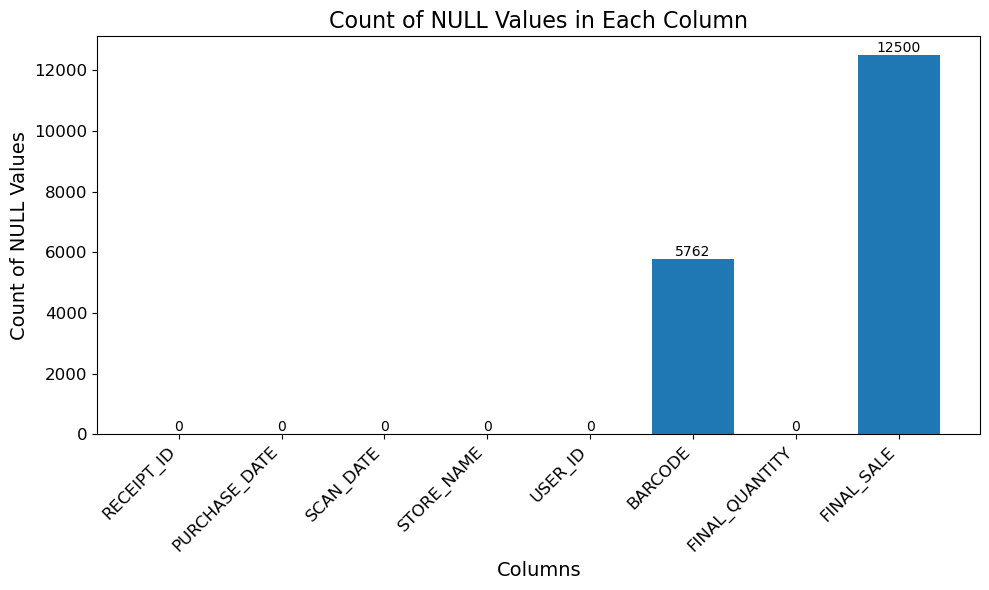

In [8]:
# Count the number of 'NULL' values in each column
null_counts = (data_filled == 'NULL').sum()

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(null_counts.index, null_counts.values)
plt.title('Count of NULL Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count of NULL Values', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add data labels on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Check data distribution

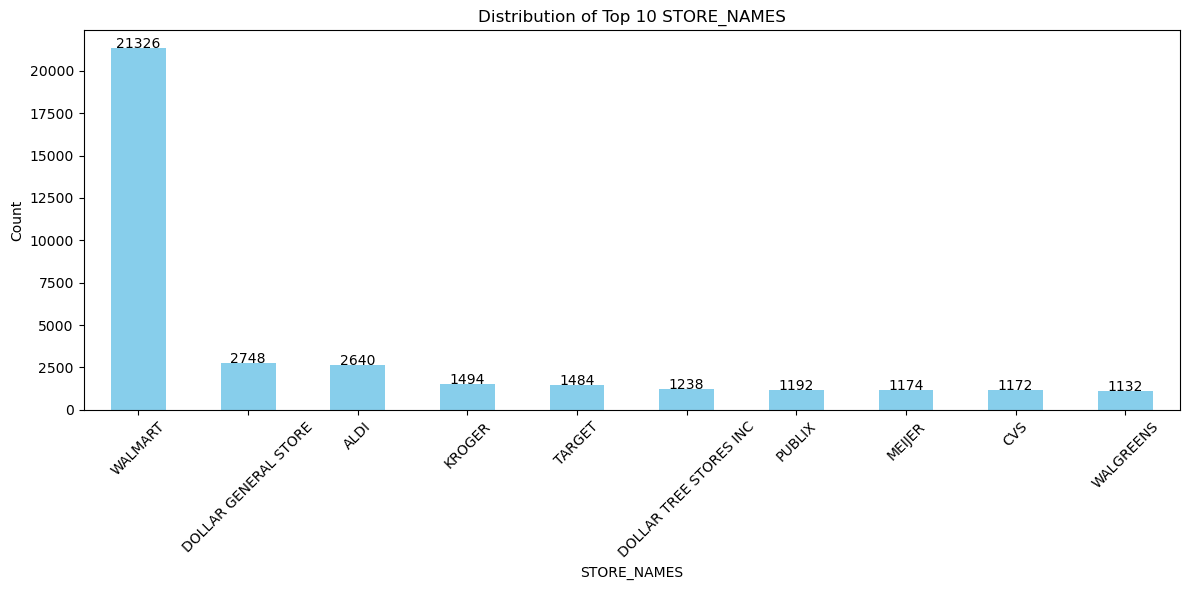

In [9]:
# Calculate the data distribution
store_distribution = data['STORE_NAME'].value_counts()

# Limit the state distribution to the top 10 stores
top_10_stores = store_distribution.head(10)

# Bar chart for the top 25 STORE_NAMES
plt.figure(figsize=(12, 6))
top_10_stores.plot(kind='bar', color='skyblue')
plt.title('Distribution of Top 10 STORE_NAMES')
plt.xlabel('STORE_NAMES')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(top_10_stores):
    plt.text(index, value + 1, str(value), ha='center')
plt.tight_layout()
plt.show()

### Change date format

In [10]:
# Convert the date columns to MM/DD/YYYY format
data['SCAN_DATE'] = pd.to_datetime(data['SCAN_DATE'], errors='coerce').dt.strftime('%m/%d/%Y')
data['PURCHASE_DATE'] = pd.to_datetime(data['PURCHASE_DATE'], errors='coerce').dt.strftime('%m/%d/%Y')

### Clean the data

In [11]:
# Check for the number of occurrences of 'zero' in the FINAL_QUANTITY column
zero_count = (data['FINAL_QUANTITY'] == 'zero').sum()

print(f"Count of 'zero' values in FINAL_QUANTITY: {zero_count}")

Count of 'zero' values in FINAL_QUANTITY: 12500


In [12]:
# Drop records where FINAL_QUANTITY is "zero"
data = data[data['FINAL_QUANTITY'] != 'zero']

In [13]:
# Count the number of "NULL" values in the FINAL_SALE column
null_count_final_sale = data_filled['FINAL_SALE'].value_counts().get('NULL', 0)

print(f"Count of 'NULL' values in FINAL_SALE: {null_count_final_sale}")

Count of 'NULL' values in FINAL_SALE: 12500


In [14]:
# Drop records where FINAL_SALE is NaN
data = data.dropna(subset=['FINAL_SALE'])

In [15]:
# Check (rows,columns) of data
data.shape

(25000, 8)

In [16]:
# View first 5 rows of data
data.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,08/20/2024,08/20/2024,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,7.455271e+11,1.00,1.65
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,08/05/2024,08/09/2024,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,7.455271e+11,1.00,1.65
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,09/03/2024,09/03/2024,WALMART,63c1cb6d3d310dceeac55487,3.700083e+10,1.00,28.22
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,08/30/2024,09/04/2024,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,1.200050e+10,1.00,5.25
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,08/23/2024,08/27/2024,TARGET,61a58ac49c135b462ccddd1c,2.400039e+10,1.00,2.59


### Check for error records

In [17]:
# Convert the dates to datetime format for subtraction
data['PURCHASE_DATE'] = pd.to_datetime(data['PURCHASE_DATE'], errors='coerce', format='%m/%d/%Y')
data['SCAN_DATE'] = pd.to_datetime(data['SCAN_DATE'], errors='coerce', format='%m/%d/%Y')

# Calculate the difference in days and store values in DAYS_DIFF column
data['DAYS_DIFF'] = (data['SCAN_DATE'] - data['PURCHASE_DATE']).dt.days

In [18]:
# View first 5 rows of data
data.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,DAYS_DIFF
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20,2024-08-20,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,7.455271e+11,1.00,1.65,0
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,2024-08-05,2024-08-09,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,7.455271e+11,1.00,1.65,4
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03,2024-09-03,WALMART,63c1cb6d3d310dceeac55487,3.700083e+10,1.00,28.22,0
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,2024-08-30,2024-09-04,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,1.200050e+10,1.00,5.25,5
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,2024-08-23,2024-08-27,TARGET,61a58ac49c135b462ccddd1c,2.400039e+10,1.00,2.59,4


In [19]:
# Count the number of rows where DATE_DIFFERENCE is negative
negative_count = (data['DAYS_DIFF'] < 0).sum()

print(f"Number of negative DAYS_DIFF values: {negative_count}")


Number of negative DAYS_DIFF values: 47


In [20]:
# Check for negative values in the BARCODE column
negative_barcodes = data[data['BARCODE'] < 0]

# Count the number of negative values in the BARCODE column
negative_barcodes_count = negative_barcodes.shape[0]

print(f"Number of negative BARCODE values: {negative_barcodes_count}")


Number of negative BARCODE values: 4


### Prepare data for analysis

In [21]:
# Replace "NULL" values with empty cells
data = data.replace('NULL', '')

## Observations
Columns:
1) RECEIPT_ID: No issues found.
2) PURCHASE_DATE: Converted to MM/DD/YYYY format.
3) SCAN_DATE: Converted to MM/DD/YYYY format.
4) STORE_NAME: No issues found
5) USER_ID: No issues found
6) BARCODE: NULL values found, 4 Negative values (-1) found
7) FINAL_QUANTITY: Found 12500 'zero' values, records deleted
8) FINAL_SALE: 12500 NULL values found, records deleted

Found 47 records where the SCAN_DATE was before PURCHASE_DATE. 
Deleting records with 'zero' value in FINAL_QUANTITY and NULL values in FINAL_SALE, lead to 50% of the original dataset i.e. from 50k rows to 25k rows.